In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.path as p
import matplotlib.patches as patches
import statsmodels.api as sm
# import seaborn as sns
import math
import scipy.spatial
# sns.set()

In [59]:
# Load the data from a .csv in the same folder
data = pd.read_csv('UseableDataDraft1.csv')

In [60]:
%%time
data
# print(data.loc[[3]])

Wall time: 0 ns


,INSTNM,SAT_AVG,ACTCMMID,ACTCM75,ADMCON7,ADM_RATE,TUITIONFEE_IN,CIP01CERT1,CIP01CERT2,CIP01ASSOC,...,C150_4_UNKN,C150_L4_WHITE,C150_L4_BLACK,C150_L4_HISP,C150_L4_ASIAN,C150_L4_AIAN,C150_L4_NHPI,C150_L4_2MOR,C150_L4_NRA,C150_L4_UNKN
0,Alabama A & M University,959.0,18.0,20.0,1.0,0.8965,10024.0,0.0,0.0,0.0,...,0.2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,University of Alabama at Birmingham,1245.0,26.0,30.0,1.0,0.8060,8568.0,0.0,0.0,0.0,...,0.6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Amridge University,NaN,NaN,NaN,NaN,NaN,6950.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,University of Alabama in Huntsville,1300.0,28.0,31.0,1.0,0.7711,11338.0,0.0,0.0,0.0,...,0.6923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama State University,938.0,17.0,20.0,1.0,0.9888,11068.0,0.0,0.0,0.0,...,0.2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6657,Pennsylvania State University-Penn State Wilke...,NaN,NaN,NaN,NaN,NaN,13604.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6658,Pennsylvania State University-Penn State York,NaN,NaN,NaN,NaN,NaN,14486.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6659,Pennsylvania State University-Penn State Great...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6660,Pennsylvania State University-Penn State Harri...,NaN,NaN,NaN,NaN,NaN,15216.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
%%time
# Code here to input student data

# sample student
# Four Year, Caucasian, Psychology, 3.8 GPA, 1090 SAT, 24 ACT, Male, TuitionTolerance, AcceptanceThreshold
s = ['4',     'WHITE',   'CIP42',    '3.8',    1090,    24,    'M',       1,                  0.1]

Wall time: 0 ns


In [62]:
%%time
# Fitness Functions to plot Admission difficulty against student satisfaction.
def fitFunctAdmin(satScore, actScore, admRate):
    score = 0
    if(np.isnan(satScore)):
        score = admRate
    else:
        # Dividing SAT and ACT scores by their global avg
        score = (satScore/1059 * actScore/20) * (1-admRate)
    return score        
    

def fitFunctSatis(compRate, tuition, tolerance):
    score = (compRate * tuition / tolerance)
    return score

Wall time: 0 ns


In [63]:
%%time
def closestPoint(stuPointX, stuPointY, adminStats, stuStats, uniPoints):
    closestId = 0
    ckdtree = scipy.spatial.cKDTree(np.column_stack([adminStats, stuStats]))
    closest = ckdtree.data[ckdtree.query([stuPointX, stuPointY])[1]]
    # uniPoints = list(uniPoints)
    uniIDSearchDict = {ID: (x,y) for ID, x, y in uniPoints}
    # print(uniIDSearchDict)
    closestId = list(uniIDSearchDict.keys())[list(uniIDSearchDict.values()).index((closest[0],closest[1]))]
    return closestId
    # print(data.loc[[closestId]]) 
    
def pointWithinCircle(stuPointX, stuPointY, uniPoints, radius):
    # get nearest points in a circle around student point
    closestPointsID = []
    lowestPoint = ("", 100)
    for ID, x, y in uniPoints:
        # First check if point lies in square to reduce calculation time
        if (square.contains_point((x,y))):
            distance = math.sqrt(math.pow(abs(x - studentPointX),2))+math.pow(abs(y - studentPointY),2)
            if (distance <= radius):
                if (lowestPoint[1] > distance):
                    lowestPoint = (ID, distance)
                closestPointsID.append((ID, distance))

    result = []
    for uniID, dist in closestPointsID:
        # round(dist, 3)*1000
        result.append((uniID, data["INSTNM"].values[uniID], round(dist, 3)*1000))
    return result, lowestPoint
    # print(result)

Wall time: 0 ns


In [64]:
%%time
# Variable to store University Names
uni_names = data["INSTNM"]
print(uni_names)

0                                Alabama A & M University
1                     University of Alabama at Birmingham
2                                      Amridge University
3                     University of Alabama in Huntsville
4                                Alabama State University
                              ...                        
6657    Pennsylvania State University-Penn State Wilke...
6658        Pennsylvania State University-Penn State York
6659    Pennsylvania State University-Penn State Great...
6660    Pennsylvania State University-Penn State Harri...
6661    Pennsylvania State University-Penn State Brand...
Name: INSTNM, Length: 6662, dtype: object
Wall time: 3.96 ms


In [65]:
%%time
# Variable to store the sat and act scores
sat_act_scores = data[["SAT_AVG", "ACTCMMID"]]
print(sat_act_scores)
print(type(sat_act_scores))

      SAT_AVG  ACTCMMID
0       959.0      18.0
1      1245.0      26.0
2         NaN       NaN
3      1300.0      28.0
4       938.0      17.0
...       ...       ...
6657      NaN       NaN
6658      NaN       NaN
6659      NaN       NaN
6660      NaN       NaN
6661      NaN       NaN

[6662 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
Wall time: 6.71 ms


In [66]:
%%time
# Variables ot store the Admin rate and tuition fees
adminRate = data["ADM_RATE"]
tuition = data["TUITIONFEE_IN"]
print(adminRate)
print(tuition)

0       0.8965
1       0.8060
2          NaN
3       0.7711
4       0.9888
         ...  
6657       NaN
6658       NaN
6659       NaN
6660       NaN
6661       NaN
Name: ADM_RATE, Length: 6662, dtype: float64
0       10024.0
1        8568.0
2        6950.0
3       11338.0
4       11068.0
         ...   
6657    13604.0
6658    14486.0
6659        NaN
6660    15216.0
6661    14486.0
Name: TUITIONFEE_IN, Length: 6662, dtype: float64
Wall time: 3 ms


In [67]:
%%time
# Variable to store all fields of study
fields = data.iloc[0:,7:197]
print(fields)

# 01 - Agriculture, Agriculture Operations, And Related Sciences.
# 03 - Natural Resources And Conservation.
# 04 - Architecture And Related Services.
# 05 - Area, Ethnic, Cultural, Gender, And Group Studies.
# 09 - Communication, Journalism, And Related Programs.
# 10 - Communications Technologies/Technicians And Support Services.
# 11 - Computer And Information Sciences And Support Services.
# 12 - Personal And Culinary Services.
# 13 - Education.
# 14 - Engineering.
# 15 - Engineering Technologies And Engineering-Related Fields.
# 16 - Foreign Languages, Literatures, And Linguistics.
# 19 - Family And Consumer Sciences/Human Sciences.
# 22 - Legal Professions And Studies.
# 23 - English Language And Literature/Letters.
# 24 - Liberal Arts And Sciences, General Studies And Humanities.
# 25 - Library Science.
# 26 - Biological And Biomedical Sciences.
# 27 - Mathematics And Statistics.
# 29 - Military Technologies And Applied Sciences.
# 30 - Multi/Interdisciplinary Studies.
# 31 - Parks, Recreation, Leisure, And Fitness Studies.
# 38 - Philosophy And Religious Studies.
# 39 - Theology And Religious Vocations.
# 40 - Physical Sciences.
# 41 - Science Technologies/Technicians.
# 42 - Psychology.
# 43 - Homeland Security, Law Enforcement, Firefighting And Related Protective Services.
# 44 - Public Administration And Social Service Professions.
# 45 - Social Sciences.
# 46 - Construction Trades.
# 47 - Mechanic And Repair Technologies/Technicians.
# 48 - Precision Production.
# 49 - Transportation And Materials Moving.
# 50 - Visual And Performing Arts.
# 51 - Health Professions And Related Programs.
# 52 - Business, Management, Marketing, And Related Support Services.
# 54 - History.


      CIP01CERT1  CIP01CERT2  CIP01ASSOC  CIP01CERT4  CIP01BACHL  CIP03CERT1  \
0            0.0         0.0         0.0         0.0         1.0         0.0   
1            0.0         0.0         0.0         0.0         0.0         0.0   
2            0.0         0.0         0.0         0.0         0.0         0.0   
3            0.0         0.0         0.0         0.0         0.0         0.0   
4            0.0         0.0         0.0         0.0         0.0         0.0   
...          ...         ...         ...         ...         ...         ...   
6657         NaN         NaN         NaN         NaN         NaN         NaN   
6658         NaN         NaN         NaN         NaN         NaN         NaN   
6659         NaN         NaN         NaN         NaN         NaN         NaN   
6660         NaN         NaN         NaN         NaN         NaN         NaN   
6661         NaN         NaN         NaN         NaN         NaN         NaN   

      CIP03CERT2  CIP03ASSOC  CIP03CERT

In [68]:
%%time
# Variable to store race information
races = data.iloc[0:,197:]
print(races)
print(type(races))

      C150_4  C150_L4  C150_4_WHITE  C150_4_BLACK  C150_4_HISP  C150_4_ASIAN  \
0     0.2866      NaN        0.3182        0.2815       0.5000        1.0000   
1     0.6117      NaN        0.6056        0.5924       0.7143        0.7405   
2     0.2500      NaN        0.5000        0.0000          NaN           NaN   
3     0.5714      NaN        0.5838        0.4783       0.5313        0.4400   
4     0.3177      NaN        0.3333        0.3219       0.2857        0.0000   
...      ...      ...           ...           ...          ...           ...   
6657     NaN      NaN           NaN           NaN          NaN           NaN   
6658     NaN      NaN           NaN           NaN          NaN           NaN   
6659     NaN      NaN           NaN           NaN          NaN           NaN   
6660     NaN      NaN           NaN           NaN          NaN           NaN   
6661     NaN      NaN           NaN           NaN          NaN           NaN   

      C150_4_AIAN  C150_4_NHPI  C150_4_

In [69]:
%%time
# Get the appropriate fields and race data for the student
studentRace = races["C150_" + s[0] + "_" + s[1]] 
#print(singleRace)

fieldIndex = fields.columns.get_loc(s[2]+"CERT1")
studentFields = fields.iloc[0:,fieldIndex:fieldIndex+5]
#print(studentFields)

# Combine all the dataframes into one

viable_schools = sat_act_scores.join(adminRate)
viable_schools = viable_schools.join(tuition)
viable_schools = viable_schools.join(studentRace)
viable_schools = viable_schools.join(studentFields)
print(viable_schools) 

# Filter any schools without values in nessesary indexes 
dropIdxs = []
for idx, row in viable_schools.iterrows():
    # Delete any rows that don't have an admission rate, tuition fee, or Completion Rate for Hispanics
    if(np.isnan(row['ADM_RATE']) or np.isnan(row['TUITIONFEE_IN']) or np.isnan(row["C150_" + s[0] + "_" + s[1]])):
        dropIdxs.append(idx)
        #viable_schools = viable_schools.drop([idx])
        
    # Delete any rows that have a 0 or NaN in all field columns
    elif((row[s[2]+"CERT1"] == 0.0 or np.isnan(row[s[2]+"CERT1"])) and (row[s[2]+"CERT2"] == 0.0 or np.isnan(row[s[2]+"CERT2"])) and
         (row[s[2]+"ASSOC"] == 0.0 or np.isnan(row[s[2]+"ASSOC"])) and (row[s[2]+"CERT4"] == 0.0 or np.isnan(row[s[2]+"CERT4"])) and
         (row[s[2]+"BACHL"] == 0.0 or np.isnan(row[s[2]+"BACHL"]))):
        dropIdxs.append(idx)
        #viable_schools = viable_schools.drop([idx])
viable_schools = viable_schools.drop(dropIdxs)
print(viable_schools)


      SAT_AVG  ACTCMMID  ADM_RATE  TUITIONFEE_IN  C150_4_WHITE  CIP42CERT1  \
0       959.0      18.0    0.8965        10024.0        0.3182         0.0   
1      1245.0      26.0    0.8060         8568.0        0.6056         0.0   
2         NaN       NaN       NaN         6950.0        0.5000         0.0   
3      1300.0      28.0    0.7711        11338.0        0.5838         0.0   
4       938.0      17.0    0.9888        11068.0        0.3333         0.0   
...       ...       ...       ...            ...           ...         ...   
6657      NaN       NaN       NaN        13604.0           NaN         NaN   
6658      NaN       NaN       NaN        14486.0           NaN         NaN   
6659      NaN       NaN       NaN            NaN           NaN         NaN   
6660      NaN       NaN       NaN        15216.0           NaN         NaN   
6661      NaN       NaN       NaN        14486.0           NaN         NaN   

      CIP42CERT2  CIP42ASSOC  CIP42CERT4  CIP42BACHL  
0       

In [70]:
%%time
# Go through all the viable schools and get the admission difficulty and student "satisfaction rate"
adminDif = [] # Lower numbers mean easier to be admitted
stuSatis = [] # lower numbers mean lower student satisfaction for university

# Temp Lists to normalize values and keep track University IDs
uniID = []
adminTempList = []
satisTempList = []

# UniCoordinates = {} # Dictionary to store corrdinates of university to find point closest to user preference

for idx, row in viable_schools.iterrows():
    valA = fitFunctAdmin(row['SAT_AVG'], row['ACTCMMID'], row['ADM_RATE'])
    valB = fitFunctSatis(row["C150_" + s[0] + "_" + s[1]], row['TUITIONFEE_IN'], 1)
    if (not(np.isnan(valA)) and not(np.isnan(valB))):
        uniID.append(idx)
        adminTempList.append(valA)
        satisTempList.append(valB)
 
for val in adminDif:
    if(np.isnan(val)):
        print("BadA")

for val in stuSatis:
    if(np.isnan(val)):
        print("BadB")

# Have likelyhood of admission paired against student statisfaction (of filtered options)
# Normalize values to facilate finding nearest points
adminDif = [float(i)/max(adminTempList) for i in adminTempList]
stuSatis = [float(i)/max(satisTempList) for i in satisTempList]

# Zip Admission Difficulty, student Satisfaction, and University ID statistics together
uniCoordinates = list(zip(uniID, adminDif, stuSatis))
adminDif = pd.Series(adminDif)
stuSatis = pd.Series(stuSatis)

Wall time: 124 ms


In [71]:
%%time
# # Plot the data
# plt.scatter(adminDif,stuSatis)
# # Name the axes
# plt.xlabel('Admission Difficulty', fontsize = 20)
# plt.ylabel('Satisfaction', fontsize = 20)
# # Show the plot
# plt.show()

Wall time: 0 ns


In [72]:
%%time
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(adminDif)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y 
# and an idependent x
results = sm.OLS(stuSatis,x).fit()
coeffs = results.params
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()

Wall time: 63.4 ms


C:\Users\Bowen Waugh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     442.6
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           1.22e-84
Time:                        10:15:19   Log-Likelihood:                 206.92
No. Observations:                1283   AIC:                            -409.8
Df Residuals:                    1281   BIC:                            -399.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1565      0.009     17.309      0.000       0.139       0.174
0              0.6918      0.033     21.039      0.000       0.627       0.756
==============================================================================
Omnibus:                       39.610   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.807
Skew:                           0.445   Prob(JB):                     5.06e-10
Kurtosis:                       2.899   Cond. No.                         5.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

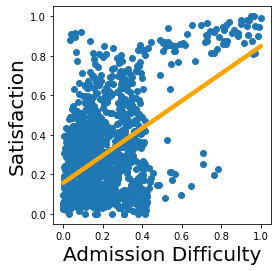

Wall time: 152 ms


In [83]:
%%time
figure, axes = plt.subplots()

# Create a scatter plot
plt.scatter(adminDif,stuSatis)

# Define the regression equation
yhat = coeffs[0]*adminDif + coeffs['const']

# Get the point of the student's GPA / SAT scores
studentPointY = coeffs[0] * fitFunctAdmin(s[4], s[5], 0) + coeffs['const']
# print(studentPointY)
# print(studentPointX)

# Normalize Y Point
studentPointY = float(studentPointY)/max(adminTempList)
studentPointX = (studentPointY - coeffs['const']) / coeffs[0]


# Plot the regression line
plt.plot(adminDif, yhat, lw=4, c='orange', label ='regression line')

# # Plot the point where the student lies on the regression line
# plt.plot(studentPointX, studentPointY, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")

# # Draw circle around student point
# distance_threshold = s[8]
# draw_circle = plt.Circle((studentPointX, studentPointY), distance_threshold, fill=False, edgecolor="black")
# plt.gcf().gca().add_artist(draw_circle)

# Draw square around circle
square = p.Path([(studentPointX+0.1, studentPointY+0.1),
                 (studentPointX-0.1, studentPointY+0.1),
                 (studentPointX-0.1, studentPointY-0.1),
                 (studentPointX+0.1, studentPointY-0.1),])

# patch = patches.PathPatch(square, fill=False, edgecolor="black")
# axes.add_patch(patch)

# Keep axis consistent
axes.set_aspect(1)

# Label the axes
plt.xlabel('Admission Difficulty', fontsize = 20)
plt.ylabel('Satisfaction', fontsize = 20)
plt.savefig('RegressionLineFigure.png')
plt.show()

In [74]:
# get the closest point to the student point
ckdtree = scipy.spatial.cKDTree(np.column_stack([adminDif, stuSatis]))
closest = ckdtree.data[ckdtree.query([studentPointX, studentPointY])[1]]

closestId = 0
uniCoordinates = list(uniCoordinates)
uniIDSearchDict = {ID: (x,y) for ID, x, y in uniCoordinates}
#print(uniIDSearchDict)
closestId = list(uniIDSearchDict.keys())[list(uniIDSearchDict.values()).index((closest[0],closest[1]))]
print(data.loc[[closestId]])
print(closest[0])
print(closest[1])

                            INSTNM  SAT_AVG  ACTCMMID  ACTCM75  ADMCON7  \
611  Trinity Washington University      NaN       NaN      NaN      2.0   

     ADM_RATE  TUITIONFEE_IN  CIP01CERT1  CIP01CERT2  CIP01ASSOC  ...  \
611    0.9579        25110.0         0.0         0.0         0.0  ...   

     C150_4_UNKN  C150_L4_WHITE  C150_L4_BLACK  C150_L4_HISP  C150_L4_ASIAN  \
611       0.4348            NaN            NaN           NaN            NaN   

     C150_L4_AIAN  C150_L4_NHPI  C150_L4_2MOR  C150_L4_NRA  C150_L4_UNKN  
611           NaN           NaN           NaN          NaN           NaN  

[1 rows x 217 columns]
0.40688467708919746
0.4268920313854694


In [81]:
%%time

# Gets the closest point to the Student Point (doesn't work)
# closePoint = closestPoint(studentPointX, studentPointY, adminDif, stuSatis, uniCoordinates)
# print((closePoint, data["INSTNM"].values[closePoint]))

closePointGroup, closestPoint = pointWithinCircle(studentPointX, studentPointY, uniCoordinates, distance_threshold)

print((closestPoint[0], data["INSTNM"].values[closestPoint[0]]))
print()
groupA = closePointGroup[:3]
for point in groupA:
    print(point)
print(".")
print(".")
print(".")
groupB = closePointGroup[len(closePointGroup)-3:]
for point in groupB:
    print(point)
# for point in closePointGroup:
#     print(point)

(1665, 'University of Northwestern-St Paul')

(180, 'Azusa Pacific University', 7.0)
(544, 'Albertus Magnus College', 58.0)
(569, 'Mitchell College', 80.0)
.
.
.
(3390, 'University of Lynchburg', 19.0)
(3563, 'Edgewood College', 11.0)
(3567, 'Lakeland University', 10.0)
Wall time: 3 ms


In [76]:
print(s[8])

0.1
